In [1]:
from video import CountsPerSec, VideoCaptureThread, ImShowThread
import argparse
import cv2 as cv
import numpy as np
import cvlib

In [2]:
def sharpen(img):
    kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
    img_sharpen = cv.filter2D(img, -1, kernel)
    return img_sharpen

In [3]:
img = cv.imread("imagenes/panaderia.jpg",cv.IMREAD_COLOR) 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img = sharpen(img)

In [4]:
def sharpen(img):
    kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
    img_sharpen = cv.filter2D(img, -1, kernel)
    return img_sharpen

In [14]:
sharpen(img)

array([[[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 89,  49, 126],
        [ 22,  12,   0],
        [  5,  29,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   1],
        ...,
        [ 36,  83,   0],
        [129,  89, 145],
        [ 97,  82, 109]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 66,  69,   0],
        [149, 173,  78],
        [  0,   2,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0]],

       [[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 198],
        [138, 255,   0],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0, 202]]

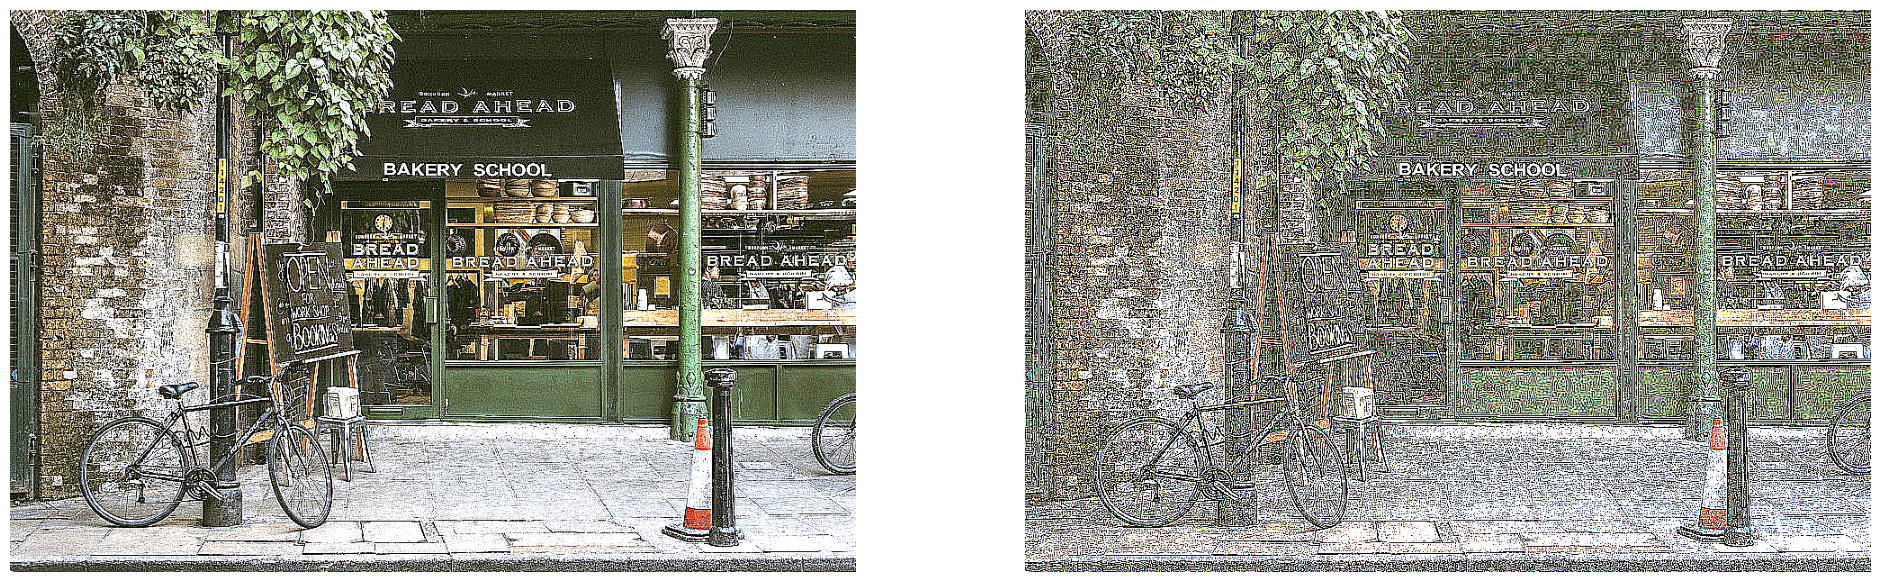

In [5]:
cvlib.imgcmp(img,sharpen(img), size=12)

In [49]:
def float64_to_uint8(img1, centered=False):
    # print("Minimo:", img1.min(), "Maximo: ", img1.max())
    print("Shape:", img1.shape)

    # print(np.var(img1))

    if not centered:
        img1 = abs(img1)
    
    temp = 255*(img1 - img1.min())/(img1.max() - img1.min())
    
    return temp.astype(np.uint8)

In [63]:
def sharpener(img): 
    # Creación de imagen con ceros 
    dimensions = img.shape
    f, c, capas = (0, 0, 0)
    sharp_img  = np.zeros(dimensions, dtype=np.float64)

    # Verificamos si la imagen es a color
    is_color = False 

    if len(sharp_img.shape) == 3: 
        is_color = True
        f, c, capas = dimensions

    # Creación del kernel     
    kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])


    # Aplicación del kernel
    if is_color == True: 

        for capa in range(capas): # Iteración capas
 
            for i in range(1, f-1): # Iteracion de filas 

                for j in range(1, c - 1): # Iteracion columnas

                    matriz = img[i-1:i+2, j-1:j+2, capa] # Corte de la matriz 

                    matriz = np.multiply(matriz, kernel) # Calculo del kernel 

                    pixel = matriz.sum() # Suma del pixel 

                    sharp_img[i, j, capa] = pixel # se guardan en la sharp_img 


    # sharp_img = sharp_img.astype('uint8')
                    

    # print("Shape:", img.shape)

    # Transfomación a uint8
    # if is_color == True: 

    #     sharp_img = float64_to_uint8(sharp_img)
        
        # for capa in range(capas): # Iteración capas

        #     print(np.var(sharp_img[:, :, capa]))
            
        #     sharp_img[:, :, capa] = float64_to_uint8(sharp_img[:, :, capa])

        #     cvlib.imgview(sharp_img[:, :, capa])

    # sharp_img = cv.normalize(sharp_img, None, 0, 255, cv.NORM_MINMAX) 
    # sharp_img = cv.convertScaleAbs(sharp_img) 


    # # Trasnform 
    # if len(sharp_img.shape) == 3: 
    #     print("Dimensiones",sharp_img.shape)
    #     print("Image is color")

    #     for i in range(3): 
    #         print(sharp_img[:,:,i])

    #         sharp_img[:,:,i] = float64_to_uint8(sharp_img[:,:,i])

    #         print(sharp_img, "\n----")

    return sharp_img


In [51]:
# sharpener(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


error: OpenCV(4.6.0) C:\b\abs_d8ltn27ay8\croot\opencv-suite_1676452046667\work\modules\imgproc\src\histogram.cpp:1008: error: (-210:Unsupported format or combination of formats)  in function 'cv::calcHist'


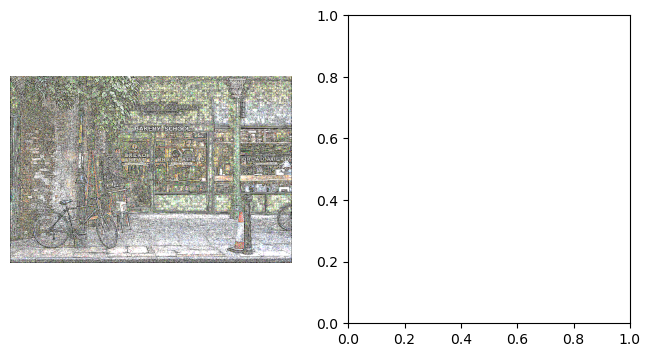

In [64]:
cvlib.hist(sharpener(img))

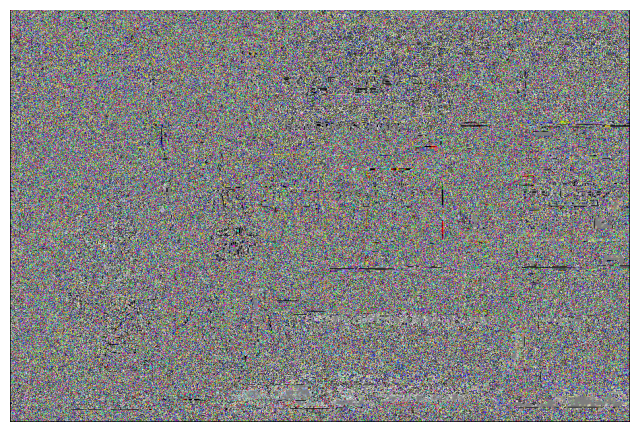

In [60]:
cvlib.imgview(sharpener(img))